# TP 1 - Julien PELEGRI & Elouan RAYMOND 

## Charger les données 


In [2]:
import pandas as pd

df = pd.read_excel (r'data_regression.xlsx')
print (df)

   X0    X1    X2     Y
0   1  0.72  0.32  6.93
1   1  0.75  0.12  5.99
2   1  0.53  0.65  1.46
3   1  0.27  0.82  1.44
4   1  0.49  0.15  4.51
5   1  0.02  0.19  1.25
6   1  0.35  0.87  2.53
7   1  0.99  0.71  6.88
8   1  0.98  0.92  6.25
9   1  0.73  0.19  6.36


## 1. Résolution analytique de la regression linéaire multiple
> On rappelle l'estimateur : $$ \hat{a} = (X'X)^{-1}X'Y$$
### 1.1 Sur le fichier de données 

In [3]:
import numpy as np
import numpy.linalg as la
X = df[['X0','X1','X2']]
Y = df['Y']

In [4]:
A = la.inv(np.dot(X.transpose(),X))
B = np.dot(X.transpose(),Y)
a_hat = np.dot(A,B)
print(a_hat)

[ 1.42423013  7.17311794 -2.52258683]


In [5]:
Y_pred1 = np.dot(a_hat,X.transpose())
Y2 = pd.DataFrame(Y_pred1,Y)
Y2.columns = ['Y_pred']
print(Y2)
delta1 = Y-Y_pred1
delta3 = np.power(delta1,2)
n_donnees = len(Y)
MSE = 1/n_donnees*sum(delta3)
print('MSE=',MSE)

        Y_pred
Y             
6.93  5.781647
5.99  6.501358
1.46  3.586301
1.44  1.292451
4.51  4.560670
1.25  1.088401
2.53  1.740171
6.88  6.734580
6.25  6.133106
6.36  6.181315
MSE= 0.6842380065507271


### 1.2 - Sur un échantillon de données aléatoires

In [25]:
from sklearn.datasets import make_regression


In [26]:
n = 100
p = 3 
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = n,
                                         # three features
                                         n_features = p,
                                         # where only two features are useful,
                                         n_informative = 2,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.5 standard deviation of the guassian noise
                                         noise = 0.5,
                                         # show the true coefficient used to generated the data
                                         coef = True)

In [27]:
pd.DataFrame(features, columns=['W1', 'W2', 'W3']).head()

,W1,W2,W3
0,1.124310,-0.707782,0.762867
1,1.616940,-0.910612,1.804067
2,-0.517451,-1.836323,0.613198
3,0.459060,-0.199307,-1.807827
4,-1.773960,0.071032,-1.010367


In [28]:
# View the output of the first five rows
pd.DataFrame(output, columns=['Z']).head()

,Z
0,132.512637
1,224.498963
2,-17.413140
3,-41.317429
4,-200.717582


In [29]:
pd.DataFrame(coef, columns=['True Coefficient Values'])

,True Coefficient Values
0,87.286428
1,0.000000
2,45.639669


In [30]:
A1 = la.inv(np.dot(features.transpose(),features))
B1 = np.dot(features.transpose(),output)
a_hat1 = np.dot(A1,B1)
pd.DataFrame(a_hat1,columns=['Estimated Coefficient Values'])

,Estimated Coefficient Values
0,87.248624
1,-0.017547
2,45.657841


## 2. Algorithme de descente du gradient - explicite
### 2.1. Sur le jeu de données

In [53]:
import matplotlib.pyplot as plt
X = df[['X0','X1','X2']]
Y = df['Y']
n = df.shape[1]
n_var = df.shape[1]-1
X = X.to_numpy()
Y = Y.to_numpy() # Conversion pour les opérations à venir 

Iteration finale: 500000
MSE par descente du gradient: 1.7105950163768813
MSE par méthode analytique: 1.7105950166039743


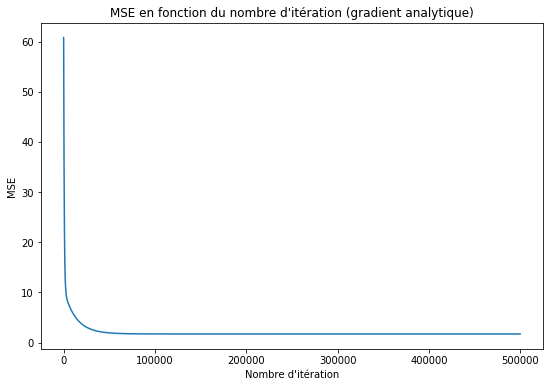

In [54]:
# Hyperparamètres
ALPHA = 0.0001  #  taux d'apprentissage
EPOCHS = 500000  #  number of iterations to perform gradient descent
EPS = 0.4  #  Epsilon
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in range(0,n_var):
        beta_hat[j] = beta_hat[j] + ALPHA * (2*np.sum((Y-Y_pred)*X[:,j]))/n

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient:",MSE[i])

beta_hat = np.dot(np.linalg.inv(np.dot(X.T,X)+0.00001*np.random.rand(n_var, n_var)),np.dot(X.T,Y))

MSE2 = sum((Y - sum(np.transpose(X*beta_hat)))**2)/n
print("MSE par méthode analytique:",MSE2)

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient analytique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()

## 3. Algorithme de descente du gradient - numérique
### 3.1. Sur le jeu de données

In [55]:
X = df[['X0','X1','X2']]
Y = df['Y']
n = df.shape[1]
n_var = df.shape[1]-1
X = X.to_numpy()
Y = Y.to_numpy() # Conversion pour les opérations à venir 

Iteration finale: 500000
MSE par déscente du gradient numérique: 1.7105959246764684


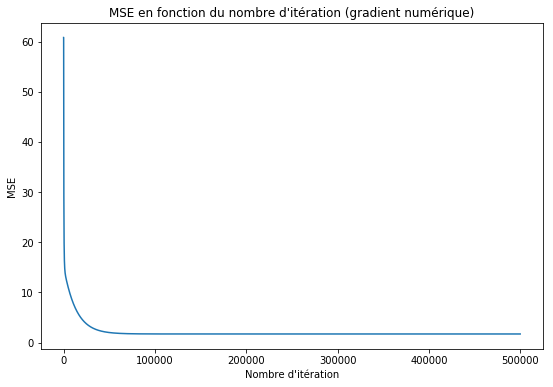

In [56]:
# Partie Gradient numérique
# Hyperparamètres
D_ALPHA = 0.001
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in range(0,n_var):
        mse1 = (np.sum((Y - Y_pred)**2))/n
        beta_hat_temp = beta_hat.copy()
        beta_hat_temp[j] += D_ALPHA
        Y_pred_temp = sum(np.transpose(X*beta_hat_temp))
        mse2 = (np.sum((Y - Y_pred_temp)**2))/n


        beta_hat[j] = beta_hat[j] - ALPHA * (mse2-mse1)/D_ALPHA

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par déscente du gradient numérique:",MSE[i])

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient numérique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()

## 4. Algorithme de descente du gradient - stochastique & explicite
### 4.1. Sur le jeu de données

In [59]:
X = df[['X0','X1','X2']]
Y = df['Y']
n = df.shape[1]
n_var = df.shape[1]-1
X = X.to_numpy()
Y = Y.to_numpy() # Conversion pour les opérations à venir 
import random

In [ ]:
# Hyperparamètres
R = 2 # Nombre de variables à considérer pour le gradient stochastique
ALPHA = 0.0001  #  taux d'apprentissage
EPOCHS = 500000  #  number of iterations to perform gradient descent
EPS = 0.5  #  Epsilon
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    liste = random.sample(list(np.arange(0, n_var)),R)
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in liste:
        beta_hat[j] = beta_hat[j] + ALPHA * (2*np.sum((Y-Y_pred)*X[:,j]))/n

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient:",MSE[i])

beta_hat = np.dot(np.linalg.inv(np.dot(X.T,X)+0.00001*np.random.rand(n_var, n_var)),np.dot(X.T,Y))

MSE2 = sum((Y - sum(np.transpose(X*beta_hat)))**2)/n
print("MSE par méthode analytique:",MSE2)

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient analytique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()

## 5. Algorithme de descente du gradient - stochastique & numérique
### 5.1. Sur le jeu de données

In [61]:
X = df[['X0','X1','X2']]
Y = df['Y']
n = df.shape[1]
n_var = df.shape[1]-1
X = X.to_numpy()
Y = Y.to_numpy() # Conversion pour les opérations à venir 
import random

Iteration finale: 500000
MSE par descente du gradient numérique: 1.710685312175554


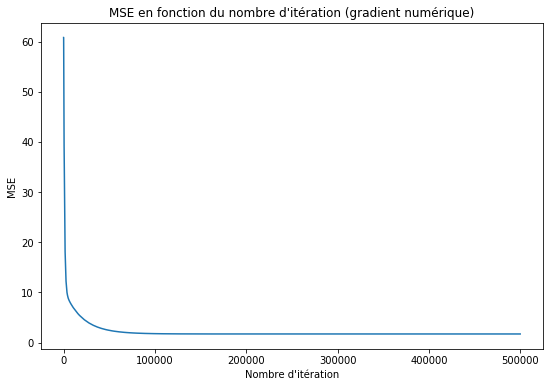

In [62]:
# Partie Gradient numérique
# Hyperparamètres
D_ALPHA = 0.01
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    liste = random.sample(list(np.arange(0, n_var)),R)
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in liste:
        mse1 = (np.sum((Y - Y_pred)**2))/n
        beta_hat_temp = beta_hat.copy()
        beta_hat_temp[j] += D_ALPHA
        Y_pred_temp = sum(np.transpose(X*beta_hat_temp))
        mse2 = (np.sum((Y - Y_pred_temp)**2))/n


        beta_hat[j] = beta_hat[j] - ALPHA * (mse2-mse1)/D_ALPHA

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient numérique:",MSE[i])

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient numérique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()